In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/drive/MyDrive/practice/Tweets.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
# We Only Need the text and sentiment columns
review_df = df[['text','airline_sentiment']]

In [9]:
review_df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


In [14]:
# there are more then 1400 columns
# now we have to columns name
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [15]:
# now we dont need neutral value in sentiment columns
# so we have to drop these rows

review_df =review_df[review_df['airline_sentiment'] != 'neutral']
review_df.shape #we can seen only 11541 rows are present in the dataset

(11541, 2)

In [16]:
# Check the values of the airline_sentiment columns
review_df.airline_sentiment.unique() #we can seen here only two values are present in the columns

array(['positive', 'negative'], dtype=object)

In [18]:
# now check how many values are positive and how many values are np.negative
review_df['airline_sentiment'].value_counts() #we can see there are 9178 values are negative and 2363 values are positive
# we can said after see this negative reviews are more as compare to positive

,count
airline_sentiment,
negative,9178
positive,2363


In [23]:
# The lebels for this dataset are categorical .
# Machines understand only numeric data
# so convert the categorical values to numeric using the factorize() method .
# # this return an array of numerical values and an index of categories

sentiment_label = review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [ ]:
# If you observe, the 0 here represents positive sentiment and the 1 represents negative sentiment.

# Now, the major part in python sentiment analysis. We should transform our text data into something that our machine learning model understands. Basically, we need to convert the text into an array of vector embeddings. Word embeddings are a beautiful way of representing the relationship between the words in the text.

# To do this, we first give each of the unique words a unique number and then replace that word with the number assigned.

In [24]:
# first, retrive all the text data from the dataset
tweet = review_df.text.values #This converts the selected Pandas Series into a NumPy array.
# The result is an array of text data.

In [25]:
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [55]:
# Now, before proceeding ahead in python sentiment analysis project let’s tokenize all the words in the text with the help of Tokenizer. In tokenization, we break down all the words/sentences of a text into small parts called tokens.
from tensorflow.keras.preprocessing.text import Tokenizer
# Step 1: Create a Tokenizer object with a vocabulary size of 5000
# 'num_words=5000' means that only the top 5000 most frequent words will be considered
tokenizer = Tokenizer(num_words = 5000)

# Step 2: Fit the tokenizer on the given text data (tweet)
# This will process the text, create a word index, and prepare the tokenizer for encoding text into numbers

tokenizer.fit_on_texts(tweet)
# like below
# 'i': 1,
#     'love': 2,
#     'programming': 3,
#     'python': 4,
#     'is': 5,
#     'great': 6,
#     'deep': 7,
#     'learning': 8

In [30]:
# The fit_on_texts() method creates an association between the words and the assigned numbers. This association is stored in the form of a dictionary in the tokenizer.word_index attribute.
# Now, replace the words with their assigned numbers using the text_to_sequence() method.

# Convert the text data into sequences of integers using the tokenizer
# Each word in the text is replaced with its corresponding integer from the word index
# "I love programming"	[1, 2, 3]
# "Python is great"	[4, 5, 6]
# "I love deep learning"	[1, 2, 7, 8]
encoded_docs = tokeniz.texts_to_sequences(tweet)

# Display the encoded sequences
encoded_docs

[[103, 575, 530, 1287, 2416, 1, 2, 177],
 [103, 88, 124, 3255, 1, 4076, 4077, 957, 15, 20, 4078, 58, 56, 25, 482, 2417],
 [103, 9, 88, 4, 124, 439, 196, 483, 86, 21],
 [103,
  388,
  83,
  281,
  219,
  4,
  8,
  7,
  205,
  28,
  198,
  25,
  29,
  2167,
  88,
  124,
  2,
  122,
  196,
  483,
  86,
  151,
  1977],
 [103, 184, 1348, 297, 49, 3, 114, 2418, 29, 1978, 150, 450],
 [103, 233, 3, 35, 3, 54, 1225],
 [103, 21, 22, 337, 9, 521, 40, 77, 347, 231, 174, 138, 1, 19],
 [103, 3, 710, 97, 650, 44, 172, 203, 154, 1225],
 [103,
  29,
  14,
  543,
  4,
  110,
  669,
  226,
  1603,
  86,
  11,
  636,
  207,
  1,
  58,
  3,
  365,
  126,
  864,
  10,
  11,
  406,
  207,
  252,
  1705],
 [103,
  60,
  151,
  20,
  1825,
  1510,
  96,
  112,
  160,
  62,
  2,
  1706,
  450,
  39,
  197,
  53,
  47,
  50],
 [103, 34],
 [103, 317, 1511, 958, 14, 66, 711],
 [103,
  44,
  879,
  7,
  11,
  166,
  1288,
  844,
  8,
  291,
  1,
  682,
  118,
  552,
  229,
  31,
  110,
  494,
  86,
  1103,
  1422],

In [49]:
# Each of the sentences in the dataset is not of equal length. Use padding to pad the sentences to have equal length.

# Import the pad_sequences function from TensorFlow Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Apply padding to the sequences
# maxlen=200 -> Ensures that all sequences are of length 200
# If a sequence is shorter, it will be padded with zeros (default padding='pre')
# If a sequence is longer, it will be truncated to fit maxlen
padded_sequence = pad_sequences(encoded_docs,maxlen = 200)

# Before
# encoded_docs = [[1, 2, 3], [4, 5, 6, 7, 8], [9, 10]]

# After
# [[ 0  0  0  1  2  3]
#  [ 0  4  5  6  7  8]
#  [ 0  0  0  9 10  0]]


In [35]:
pandas_sequence

array([[   0,    0,    0, ...,    1,    2,  177],
       [   0,    0,    0, ...,   25,  482, 2417],
       [   0,    0,    0, ...,  483,   86,   21],
       ...,
       [   0,    0,    0, ...,    8,    1,  480],
       [   0,    0,    0, ..., 1682,   45,  945],
       [   0,    0,    0, ...,  144,   11, 2325]], dtype=int32)

In [ ]:
# 2. Build the Text Classifier
# For sentiment analysis project, we use LSTM layers in the machine learning model. The architecture of our model consists of an embedding layer, an LSTM layer, and a Dense layer at the end. To avoid overfitting, we introduced the Dropout mechanism in-between the LSTM layers.
# LSTM stands for Long Short Term Memory Networks. It is a variant of Recurrent Neural Networks. Recurrent Neural Networks are usually used with sequential data such as text and audio. Usually, while computing an embedding matrix, the meaning of every word and its calculations (which are called hidden states) are stored. If the reference of a word, let’s say a word is used after 100 words in a text, then all these calculations RNNs cannot store in its memory. That’s why RNNs are not capable of learning these long-term dependencies.
# LSTMs on the other hand work well with such text. LSTM networks work well with time-series data.

# Dropout is one of the regularization techniques. It is used to avoid overfitting. In the dropout mechanism, we drop some neurons randomly. The layer takes an argument, a number between 0 and 1 that represents the probability to drop the neurons. This creates a robust model avoiding overfitting.

# explanation of these processes
# 1️⃣ Import necessary libraries
# TensorFlow is used to build and train deep learning models.
# The Sequential model allows us to stack layers in order.
# We use LSTM (Long Short-Term Memory) layers to process text data.
# Dropout is a regularization technique to prevent overfitting.

# 2️⃣ Define model parameters
# vocab_size: The number of unique words the model will consider from the dataset.
# embedding_dim: Each word is represented as a vector of this size.
# max_length: All input sequences will be padded to this length.
# dropout_rate: Defines the percentage of neurons to deactivate during training.

# 3️⃣ Build the LSTM-based text classifier model
# Step 1: Embedding Layer
# - Converts word indices into fixed-size dense vectors.
# - Helps the model understand semantic relationships between words.

# Example:
# Input sentence: "I love programming"
# After tokenization: [1, 2, 3]
# After embedding: [[0.12, 0.45, ..., 0.88], [0.36, 0.78, ..., 0.51], [0.92, 0.11, ..., 0.67]]

# Step 2: LSTM Layer
# - LSTMs help the model remember important words even if they appear far apart in a sentence.
# - Unlike traditional RNNs, LSTMs can learn long-term dependencies.

# Example:
# Sentence: "The movie was boring but the ending was exciting."
# Normal RNN might forget "boring" by the time it reaches "exciting."
# LSTM remembers "boring" and correctly classifies sentiment.

# Step 3: Dropout Layer
# - Drops a percentage of neurons randomly during training.
# - Helps prevent overfitting by making the model robust.

# Example:
# If a Dropout rate of 50% is applied, only half of the neurons will be active in each iteration.
# This forces the model to learn different patterns rather than relying on specific neurons.

# Step 4: Additional LSTM Layer
# - Stacking another LSTM layer improves learning capacity.
# - Helps capture deeper relationships between words.

# Step 5: Dense (Fully Connected) Layer
# - Extracts features from LSTM outputs.
# - Uses ReLU activation to introduce non-linearity.

# Step 6: Output Layer
# - Uses a single neuron with a sigmoid activation function.
# - Sigmoid outputs values between 0 and 1, representing the probability of a positive sentiment.

# Example:
# If output = 0.92 → High probability of positive sentiment.
# If output = 0.12 → High probability of negative sentiment.

# 4️⃣ Compile the model
# - Uses Binary Crossentropy loss because it's a binary classification problem (Positive/Negative).
# - Adam optimizer adjusts weights efficiently to minimize loss.
# - Tracks accuracy as a performance metric.

# 5️⃣ Display the model summary
# - Shows each layer, its parameters, and output shape.
# - Helps in debugging and ensuring the architecture is correct.

# After building the model, train it using actual data.
# Use the trained model to predict sentiment on new text inputs.


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D

# Define model parameters
vocab_size = 5000  # Number of unique words in the dataset
embedding_vector_length = 32  # Size of the word embeddings
max_length = 200  # Maximum sequence length after padding

# Initialize the model
model = Sequential()

# Embedding Layer (Explicitly defining input shape)
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, input_length=max_length))

# Spatial Dropout Layer
model.add(SpatialDropout1D(0.25))

# LSTM Layer
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))

# Dropout Layer
model.add(Dropout(0.2))

# Fully Connected Layer
model.add(Dense(1, activation='sigmoid'))

# **Build the model by passing a sample input shape**
model.build(input_shape=(None, max_length))

# Compile the Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the Model Summary
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 200, 32)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_2                  │ (None, 200, 32)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          16,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,651 (690.04 KB)

 Trainable params: 176,651 (690.04 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# 3. Train the sentiment analysis model
# Train the sentiment analysis model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2,epochs=5,batch_size=32)

# this Sentiment analysis model obtained 95.27% accuracy on the training set and 93.11% accuracy on the test set

Epoch 1/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 84s 272ms/step - accuracy: 0.7817 - loss: 0.5304 - val_accuracy: 0.9043 - val_loss: 0.2372
Epoch 2/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 79s 261ms/step - accuracy: 0.8901 - loss: 0.2777 - val_accuracy: 0.9199 - val_loss: 0.1956
Epoch 3/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 75s 260ms/step - accuracy: 0.9256 - loss: 0.2050 - val_accuracy: 0.9259 - val_loss: 0.1867
Epoch 4/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 74s 256ms/step - accuracy: 0.9417 - loss: 0.1652 - val_accuracy: 0.9307 - val_loss: 0.1785
Epoch 5/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 85s 266ms/step - accuracy: 0.9527 - loss: 0.1359 - val_accuracy: 0.9311 - val_loss: 0.1861


In [ ]:
# Train the sentiment analysis model for 5 epochs
# - `model.fit()` is used to train the model on the dataset.
# - `padded_sequence` is the input data (text converted to numerical sequences and padded).
# - `sentiment_label[0]` is the corresponding labels for sentiment classification (0 for negative, 1 for positive).
# - `validation_split=0.2` means 20% of the training data will be used for validation.
# - `epochs=5` means the model will go through the entire dataset 5 times.
# - `batch_size=32` means the model processes 32 samples at a time to update weights.

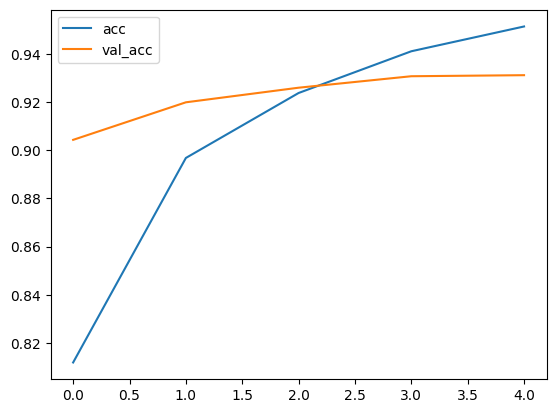

<Figure size 640x480 with 0 Axes>

In [51]:
# Let’s plot these metrics using the matplotlib.

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label = 'acc')
plt.plot(history.history['val_accuracy'],label ='val_acc')
plt.legend()
plt.show()
plt.savefig('Accuracy plot.jpg')

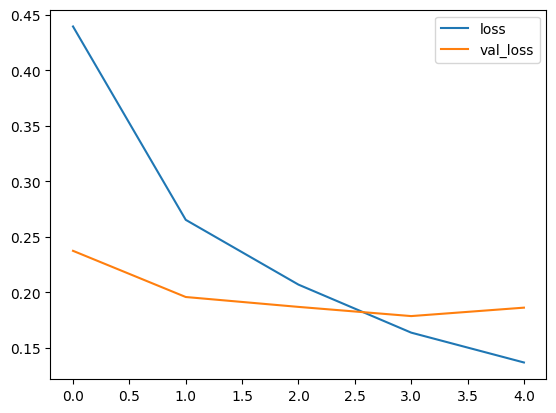

<Figure size 640x480 with 0 Axes>

In [52]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [56]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
Predicted label:  positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted label:  negative
